**Datasets can be downloaded from https://www.dropbox.com/sh/zv6z7f3kzrafwmq/AACAlU8akbO_a-JOeJkiWT1za?dl=0**  
Ref: Buenrostro, J.D. et al. Integrated Single-Cell Analysis Maps the Continuous Regulatory Landscape of Human Hematopoietic Differentiation. Cell (2018).

In [1]:
%matplotlib inline

In [2]:
import stream as st
st.__version__

'0.3.5'

since **st.counts_to_kmers()** could take a long time (**a few hours**).

here user can instead read in a precomputed object to reproduce the analysis:  

In [3]:
adata = st.read(file_name='./zscore.tsv.gz',experiment='atac-seq')

Using default working directory.
Saving results in: /Users/hardy/Desktop/tutorial/4/stream_result


To get the **zscore file**, user can instead run the following command:

```python
import stream_atac  
adata = stream_atac.preprocess_atac(file_count='./count_file.tsv.gz',file_region='./region_file.bed.gz',file_sample='./sample_file.tsv.gz')
```

or run the following command in terminal  
`stream_atac -c count_file.tsv.gz -s sample_file.tsv.gz -r region_file.bed.gz`

In [4]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

using all the genes ...
15 PCs are selected


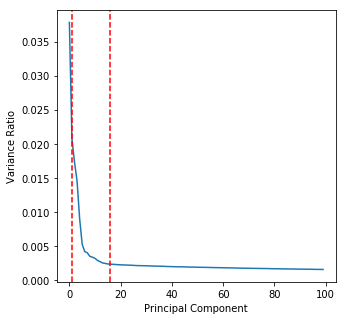

In [5]:
st.select_top_principal_components(adata)

In [6]:
st.dimension_reduction(adata,feature='top_pcs',n_components=4)

4 cpus are being used ...


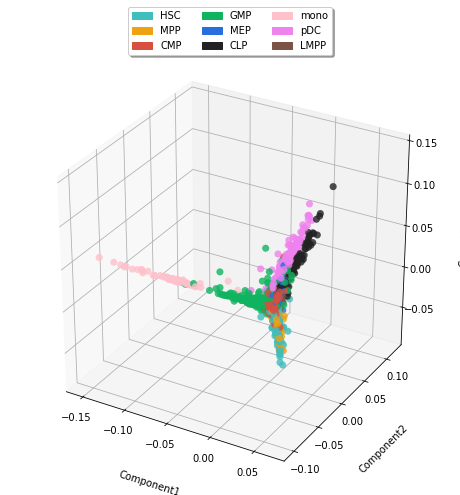

In [7]:
st.plot_dimension_reduction(adata)

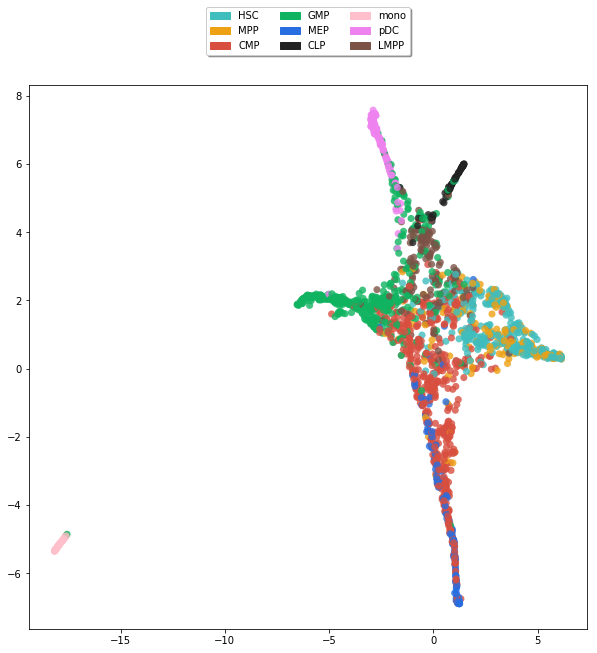

In [8]:
st.plot_visualization_2D(adata,use_precomputed=False,nb_pct=0.5)

In [9]:
st.seed_elastic_principal_graph(adata)

Seeding initial elastic principal graph...
Clustering...
Affinity propagation ...
The number of initial nodes is 56
Calculatng minimum spanning tree...
Number of initial branches: 17


In [10]:
st.elastic_principal_graph(adata)

epg_n_nodes is too small. It is corrected to the initial number of nodes plus incr_n_nodes
Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 86 nodes on 2034 points and 4 dimensions"


[1]
 "Using a single core"


Nodes = 
56
 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 
80
 
81
 
82
 
83
 
84
 
85
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||86
	
0.0001519
	
86
	
85
	
78
	
3
	
0
	
0
	
7.713e-05
	
7.441e-05
	
0.9608
	
0.9622
	
6.949e-05
	
5.273e-06
	
0.0004535
	
0.039
	
0


99.912 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 116 nodes on 2034 points and 4 dimensions"


[1]
 "Using a single core"


Nodes = 
86
 
87
 
88
 
89
 
90
 
91
 
92
 
93
 
94
 
95
 
96
 
97
 
98
 
99
 
100
 
101
 
102
 
103
 
104
 
105
 
106
 
107
 
108
 
109
 
110
 
111
 
112
 
113
 
114
 
115
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||116
	
9.554e-05
	
116
	
115
	
108
	
3
	
0
	
0
	
5.615e-05
	
5.413e-05
	
0.9715
	
0.9725
	
3.596e-05
	
3.428e-06
	
0.0003977
	
0.04613
	
0


15.89 sec elapsed

Number of branches after optimizing branching: 7


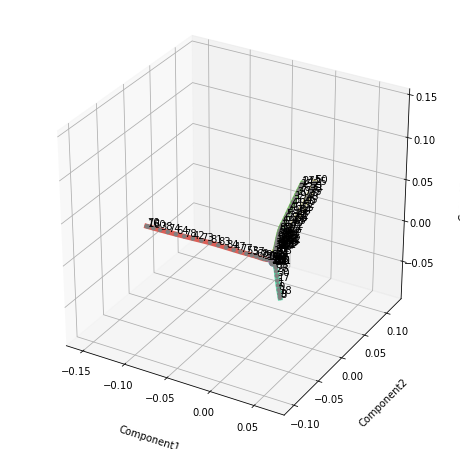

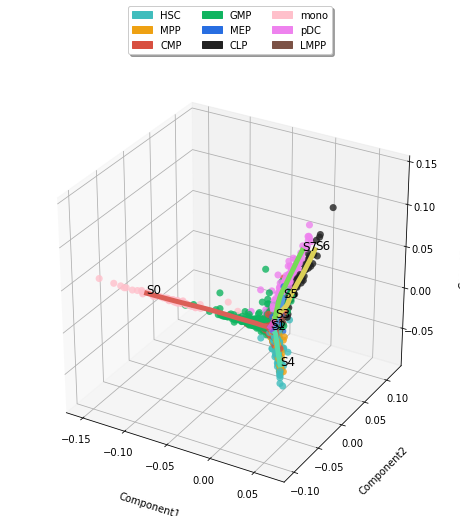

In [11]:
st.optimize_branching(adata,reset=True)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Collasping small branches ...
[1]
 "Removing the bridge branch with nodes: 11 30"


[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 115 nodes on 2034 points and 4 dimensions"


[1]
 "Using a single core"


0.076 sec elapsed

Number of branches after pruning ElPiGraph: 6


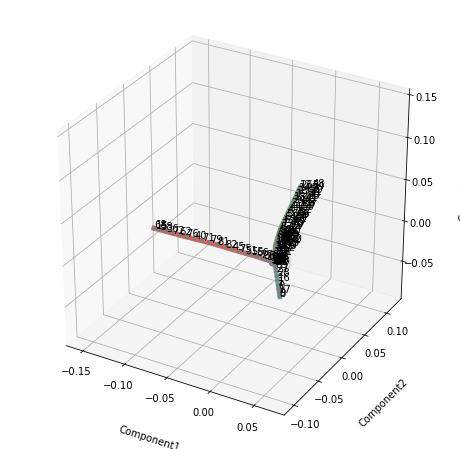

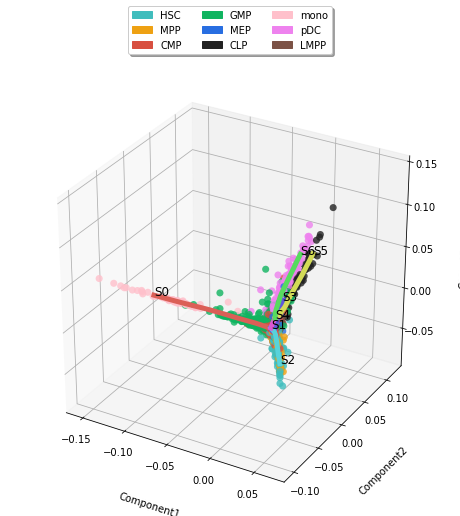

In [12]:
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 6


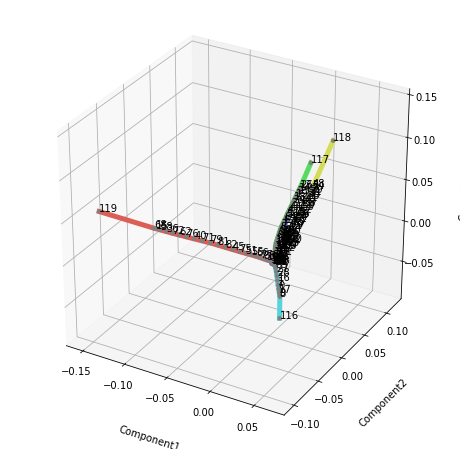

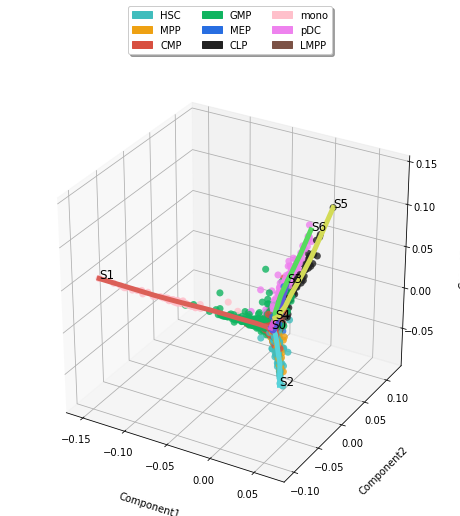

In [13]:
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

/Users/hardy/anaconda3/envs/stream/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


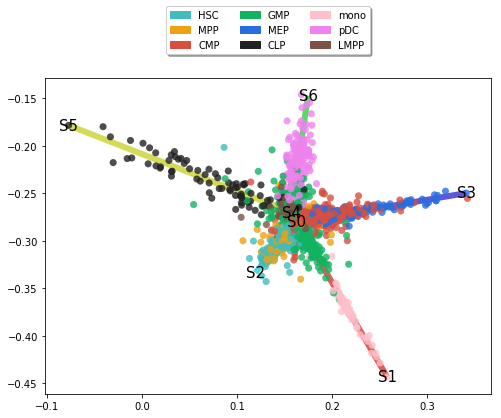

In [14]:
st.plot_flat_tree(adata)

Importing precomputed umap visualization ...
Importing precomputed umap visualization ...


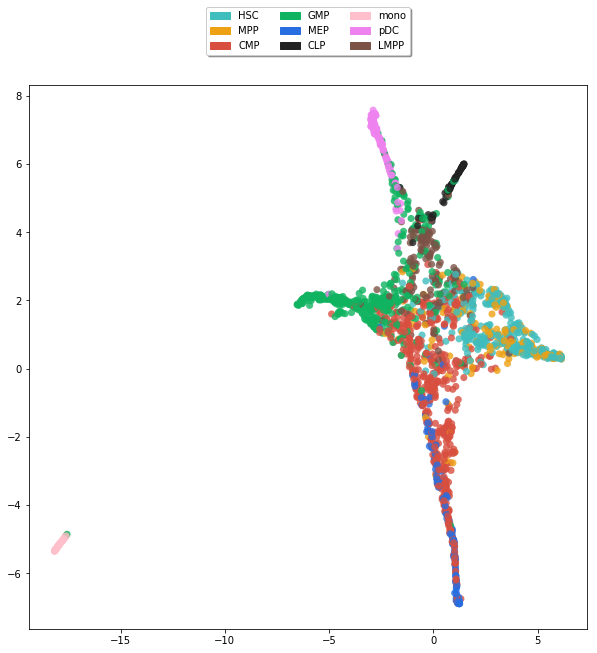

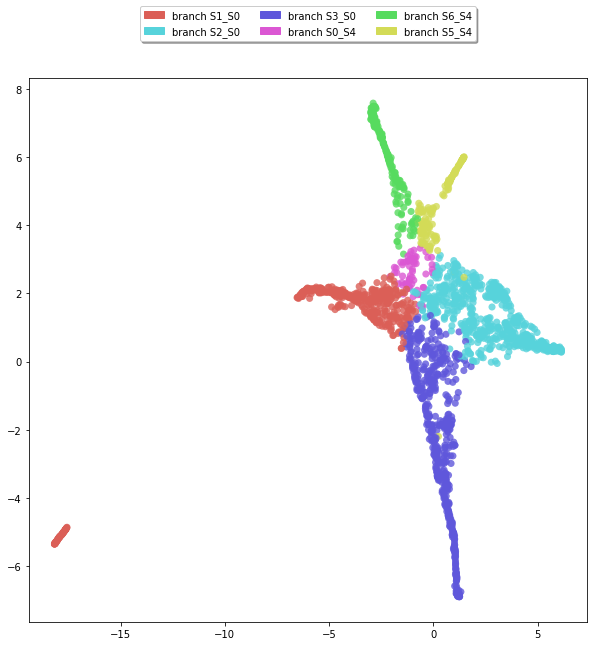

In [15]:
st.plot_visualization_2D(adata)
st.plot_visualization_2D(adata,color_by='branch')

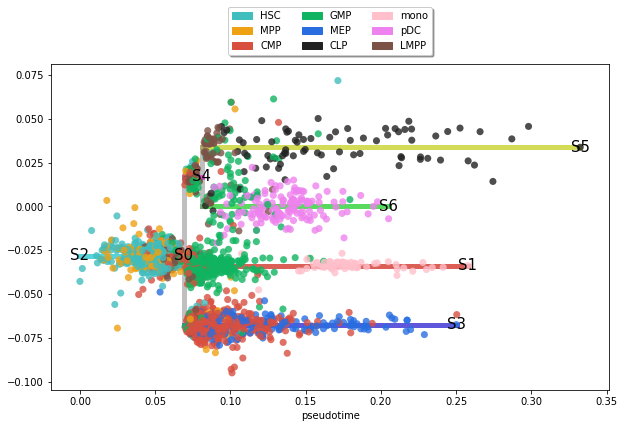

In [16]:
st.subwaymap_plot(adata,root='S2')

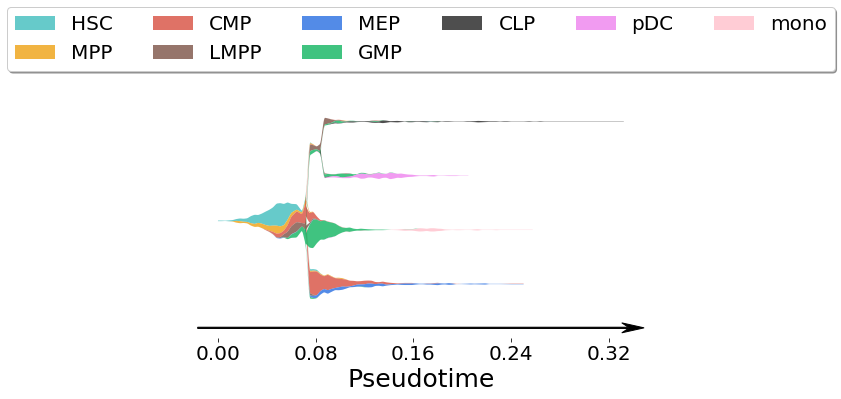

In [17]:
st.stream_plot(adata,root='S2',fig_legend_ncol=6,fig_size=(8,8))

By default **factor_min_win=2.0**, adjusting it (between 1.0 and 2.0) can make smoother stream plot

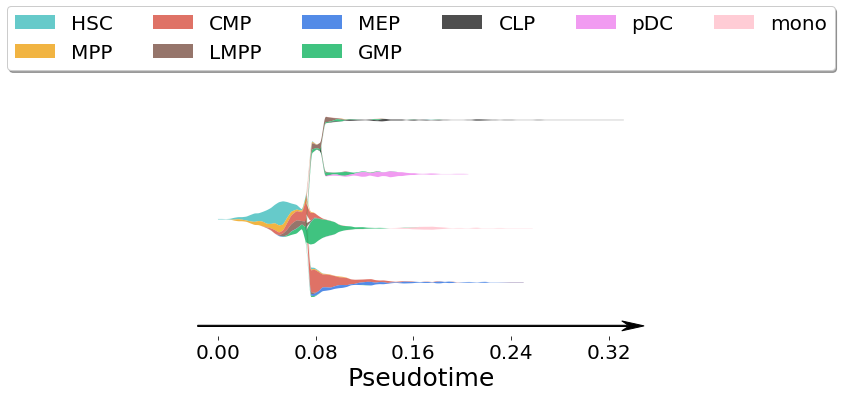

In [18]:
st.stream_plot(adata,root='S2',fig_legend_ncol=6,fig_size=(8,8),factor_min_win=1.8)

For stream plot with **'thin branches'**, log2 view of stream plot (by specifying **'flag_log_view=True'**) will help zoom in the thin branches with very few cells by log2 transformation and visualize the composition of cells on the thin branches  
**factor_zoomin**: suggested value 50~200

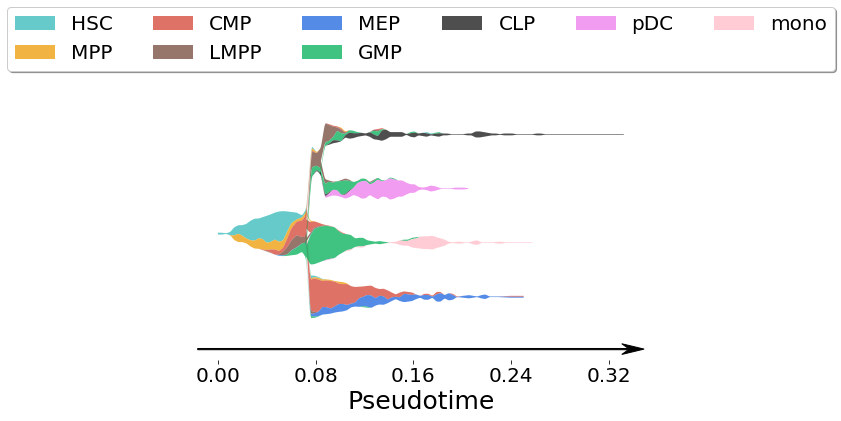

In [21]:
st.stream_plot(adata,root='S2',fig_legend_ncol=6,fig_size=(8,8),factor_min_win=1.8,flag_log_view=True,factor_zoomin=50)

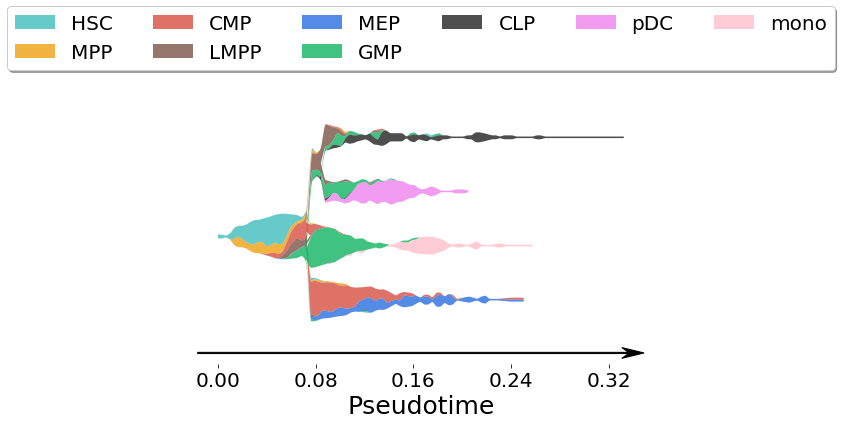

In [22]:
st.stream_plot(adata,root='S2',fig_legend_ncol=6,fig_size=(8,8),factor_min_win=1.8,flag_log_view=True,factor_zoomin=100)

In [23]:
st.write(adata)